### Unsupervised Learning - Clustering

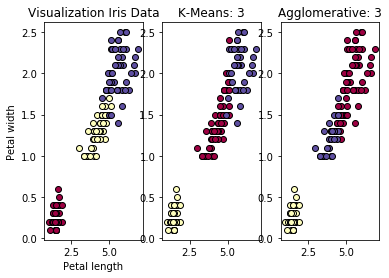

Silhouette_score k-Means : 0.32585038523072946
Silhouette_score Agglomerative : -0.006737957661740429


In [2]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

iris = datasets.load_iris()

X = iris.data
y = iris.target

plt.subplot(1, 3, 1)
unique_labels = set(y)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    class_member_mask = (y == k)
    xy = X[class_member_mask]
    plt.plot(xy[:, 2], xy[:, 3], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)
plt.title('Visualization Iris Data')
plt.xlabel('Petal length')
plt.ylabel('Petal width')

kmeans = KMeans(n_clusters=3).fit(X)

plt.subplot(1, 3, 2)
unique_labels = set(kmeans.labels_)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):

    kmeans_labels = (kmeans.labels_ == k)

    xy = X[kmeans_labels]
    plt.plot(xy[:, 2], xy[:, 3], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('K-Means: %d' % kmeans.n_clusters)

agglomerative = AgglomerativeClustering(linkage='complete',n_clusters=3).fit(X)

plt.subplot(1, 3, 3)
unique_labels = set(agglomerative.labels_)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):

    agglo_labels = (agglomerative.labels_ == k)

    xy = X[agglo_labels]
    plt.plot(xy[:, 2], xy[:, 3], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Agglomerative: %d' % agglomerative.n_clusters)

plt.show()

print("Silhouette_score k-Means :",silhouette_score(X, kmeans_labels))
print("Silhouette_score Agglomerative :", silhouette_score(X, agglo_labels))

For n_clusters = 2 The silhouette_score k-Means is : 0.680813620278794
For n_clusters = 3 The silhouette_score k-Means is : 0.5525919445309031
For n_clusters = 4 The silhouette_score k-Means is : 0.49699284996062476
For n_clusters = 5 The silhouette_score k-Means is : 0.4910127633001969
For n_clusters = 6 The silhouette_score k-Means is : 0.4686910471119456
For n_clusters = 7 The silhouette_score k-Means is : 0.3604992213046134
For n_clusters = 8 The silhouette_score k-Means is : 0.3553784506969366
For n_clusters = 9 The silhouette_score k-Means is : 0.3426981624625142
For n_clusters = 10 The silhouette_score k-Means is : 0.31879954253616505


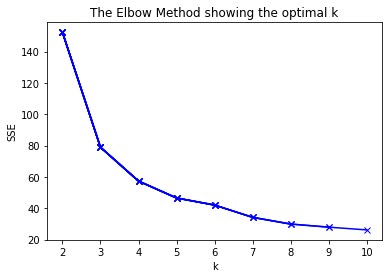

In [3]:
import numpy as np
from sklearn import datasets
import pylab as pl
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

iris = datasets.load_iris()

X = iris.data
y = iris.target

SSE = {}

K = [2, 3, 4, 5, 6, 7, 8, 9, 10]
for k in K:
    kmeans = KMeans(n_clusters= k).fit(X) 
    kmeans_labels = kmeans.labels_
    SSE[k] = kmeans.inertia_
    silhouette_kmeans = silhouette_score(X, kmeans_labels)
    print("For n_clusters =", k,
          "The silhouette_score k-Means is :", silhouette_kmeans)
    
    pl.plot(list(SSE.keys()), list(SSE.values()), 'b-x')
    
pl.xlabel('k')
pl.ylabel('SSE')
pl.title('The Elbow Method showing the optimal k')
pl.show()


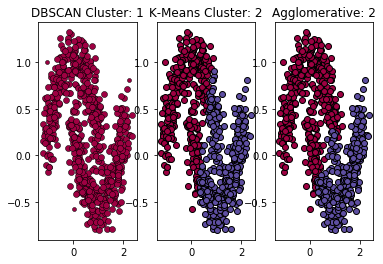

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN, KMeans
from sklearn import datasets
from sklearn import metrics
from sklearn.datasets.samples_generator import make_blobs, make_circles, make_moons

centers = [[1, 1], [-1, -1], [1, -1]]
#X, labels_true = make_blobs(n_samples=750, centers=centers, cluster_std=0.3, random_state=0)

#X, labels_true = make_circles(n_samples=750, factor=.5, noise=.07)

X, labels_true = make_moons(n_samples=750, noise=.15)                                                      


# Compute DBSCAN
db = DBSCAN(eps=0.3, min_samples=5).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True

# Number of clusters in labels, ignoring noise if present.
db_n_clusters = len(set(db.labels_)) - (1 if -1 in db.labels_ else 0)

# Compute KMeans
kmeans = KMeans(n_clusters=2).fit(X)

# Compute Agglomerative
agglomerative = AgglomerativeClustering(linkage='average',n_clusters=2).fit(X)

plt.subplot(1, 3, 1)

unique_labels = set(db.labels_)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (db.labels_ == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markeredgewidth=0.5, markersize=6)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markeredgewidth=0.5, markersize=4)

plt.title('DBSCAN Cluster: %d' % db_n_clusters)

plt.subplot(1, 3, 2)
unique_labels = set(kmeans.labels_)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):

    class_member_mask = (kmeans.labels_ == k)

    xy = X[class_member_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('K-Means Cluster: %d' % kmeans.n_clusters)

plt.subplot(1, 3, 3)
unique_labels = set(agglomerative.labels_)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):

    class_member_mask = (agglomerative.labels_ == k)

    xy = X[class_member_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Agglomerative: %d' % agglomerative.n_clusters)


plt.show()

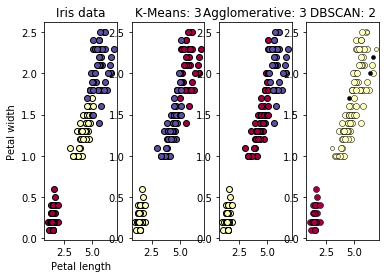

In [5]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, DBSCAN
from sklearn import metrics


iris = datasets.load_iris()

X = iris.data
y = iris.target

plt.subplot(1, 4, 1)
unique_labels = set(y)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    class_member_mask = (y == k)
    xy = X[class_member_mask]
    plt.plot(xy[:, 2], xy[:, 3], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)
plt.title('Iris data')
plt.xlabel('Petal length')
plt.ylabel('Petal width')

kmeans = KMeans(n_clusters=3).fit(X)

plt.subplot(1, 4, 2)
unique_labels = set(kmeans.labels_)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):

    class_member_mask = (kmeans.labels_ == k)

    xy = X[class_member_mask]
    plt.plot(xy[:, 2], xy[:, 3], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('K-Means: %d' % kmeans.n_clusters)


# Compute Agglomerative
agglomerative = AgglomerativeClustering(linkage='average',n_clusters=3).fit(X)

plt.subplot(1, 4, 3)
unique_labels = set(agglomerative.labels_)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):

    class_member_mask = (agglomerative.labels_ == k)

    xy = X[class_member_mask]
    plt.plot(xy[:, 2], xy[:, 3], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Agglomerative: %d' % agglomerative.n_clusters)


# Compute DBSCAN
db = DBSCAN(eps=0.7, min_samples=5).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True

# Number of clusters in labels, ignoring noise if present.
db_n_clusters = len(set(db.labels_)) - (1 if -1 in db.labels_ else 0)

plt.subplot(1, 4, 4)

unique_labels = set(db.labels_)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (db.labels_ == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 2], xy[:, 3], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markeredgewidth=0.5, markersize=6)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 2], xy[:, 3], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markeredgewidth=0.5, markersize=4)

plt.title('DBSCAN: %d' % db_n_clusters)

plt.show()